In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib import style
# from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
def extract_h5(file_name):
    f = h5py.File(file_name,'r')
    data=[]
    for key in f.keys():
        group = f[key]
        if key=='y':
            temp=np.asarray(group[()])
            temp=np.reshape(temp,(temp.shape[0],1))
            data.append(temp)
        else:
            data.append(np.asarray(group[()]))
    return data

In [3]:
if (__name__ == "__main__"):
    data=[]
    for i in range(1,6):
        data.append(extract_h5('./q1_datasets/data_'+str(i)+'.h5'))
    print(data[3][0].shape)

(2000, 2)


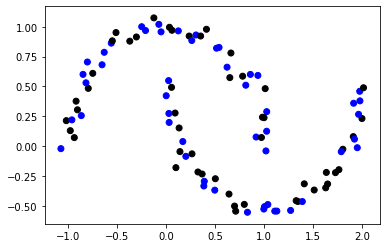

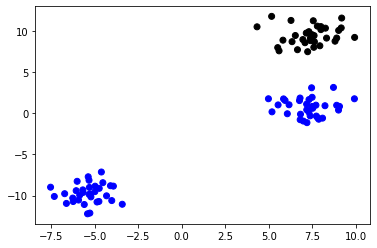

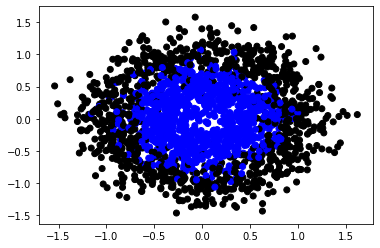

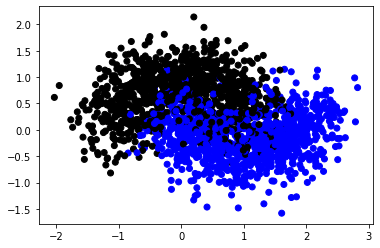

In [4]:
def ploty(x,y):
    cols=[]
    for i in y:
        if i==0:
            cols.append('black')
        else:
            cols.append('blue')
    plt.scatter(x[:,0],x[:,1],c=cols)
    plt.show()
ploty(data[1][0],data[0][1])
ploty(data[2][0],data[2][1])
ploty(data[3][0],data[3][1])
ploty(data[4][0],data[4][1])

In [5]:
# %matplotlib notebook
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# xs=np.square(X[:,0])
# ys=np.square(X[:,1])
# zs=(2)*xs*ys
# ax.scatter(xs, ys, zs,c=cols)


In [ ]:
plt.plot(x,y)
plt.show()

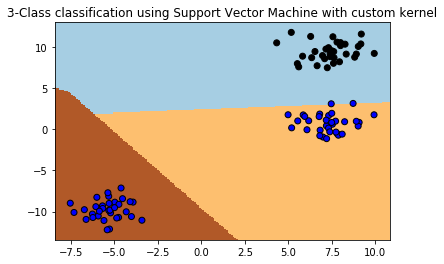

In [9]:
def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[0,2],[1,0]])
    return np.dot(np.dot(X, M), Y.T)
X=data[2][0]
y=data[2][1]
cols=[]
for i in y:
    if i==0:
        cols.append('black')
    else:
        cols.append('blue')
plt.scatter(X[:,0], X[:,1],c=cols,s=50)
svc= SVC(kernel=my_kernel)
svc.fit(X,y.ravel())
clf=svc
# Limit of the axes
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Creating the meshgrid
xx = np.linspace(xlim[0], xlim[1], 200)
yy = np.linspace(ylim[0], ylim[1], 200)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1],c=cols, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()
